## Normal conditions manipulations

### The intiution behind labeling our data

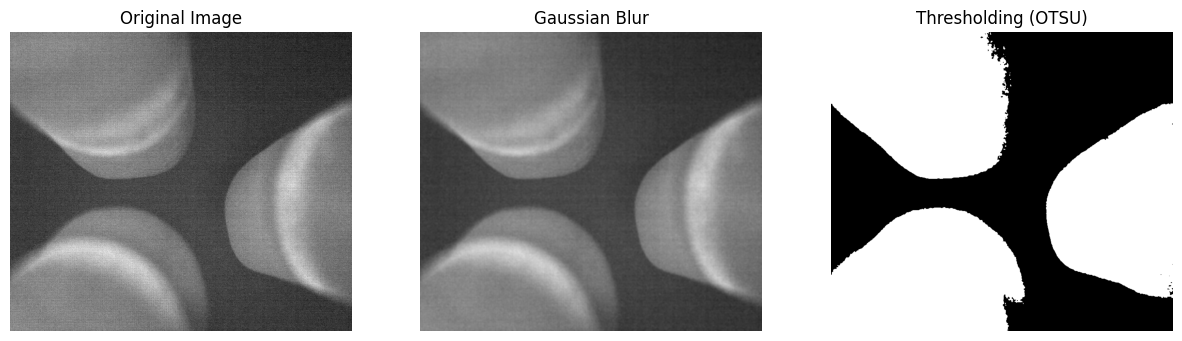

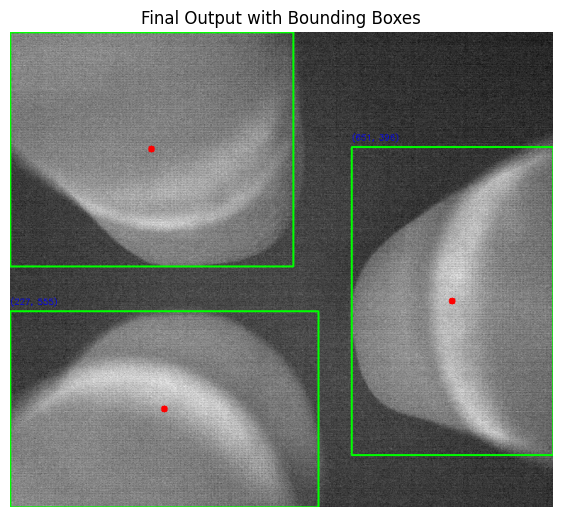

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def calculate_positions_and_distances(input_image_path, min_area=500):
    # Load the image
    img = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(img, (7, 7), 0)

    # Thresholding
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    output_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Iterate through contours and draw bounding boxes
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            # Calculate bounding box and centroid
            x, y, w, h = cv2.boundingRect(contour)
            cX = int(x + w / 2)
            cY = int(y + h / 2)

            # Draw bounding box and centroid on the image
            cv2.rectangle(output_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.circle(output_img, (cX, cY), 5, (0, 0, 255), -1)
            cv2.putText(output_img, f"({cX}, {cY})", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

    # Convert images to RGB (matplotlib expects RGB images)
    blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB)
    thresh_rgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
    output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

    # Create a subplot with 3 images: original, blurred, thresholded, and final output
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Blurred Image
    plt.subplot(1, 3, 2)
    plt.imshow(blurred_rgb)
    plt.title('Gaussian Blur')
    plt.axis('off')

    # Thresholded Image
    plt.subplot(1, 3, 3)
    plt.imshow(thresh_rgb)
    plt.title('Thresholding (OTSU)')
    plt.axis('off')

    # Display final image with bounding boxes
    plt.figure(figsize=(7, 7))
    plt.imshow(output_img_rgb)
    plt.title('Final Output with Bounding Boxes')
    plt.axis('off')

    # Show all plots
    plt.show()

# Example usage for a single image
input_image_path = "D:\\Frames\\vid1\\1frame_00000.jpg"  # Path to the specific image
calculate_positions_and_distances(input_image_path)


### Coloroud contours

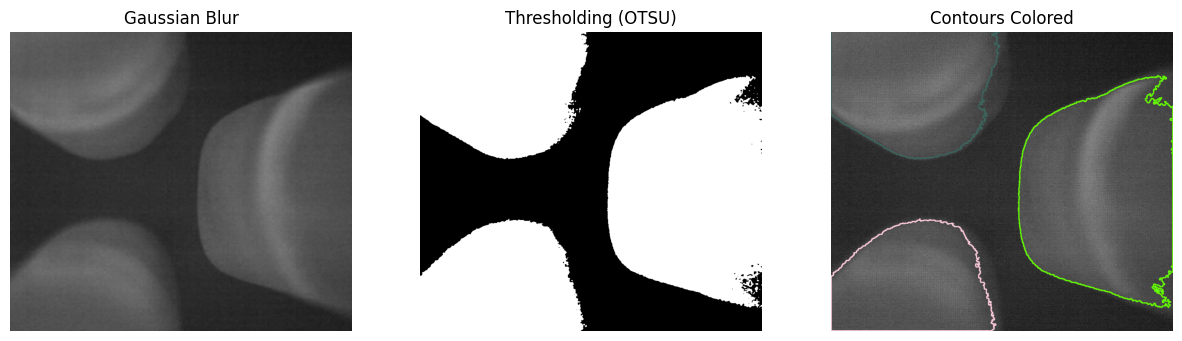

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def color_contours(input_image_path, min_area=500):
    # Load the image
    img = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur and thresholding
    blurred = cv2.GaussianBlur(img, (7, 7), 0)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    output_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Draw and color contours
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            color = tuple(np.random.randint(0, 256, 3).tolist())  # Generate a random color
            cv2.drawContours(output_img, [contour], -1, color, 2)

    # Convert images to RGB (matplotlib expects RGB images)
    blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB)
    thresh_rgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
    output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

    # Create a subplot with 3 images: blurred, thresholded, and final output
    plt.figure(figsize=(15, 5))

    # Blurred Image
    plt.subplot(1, 3, 1)
    plt.imshow(blurred_rgb)
    plt.title('Gaussian Blur')
    plt.axis('off')

    # Thresholded Image
    plt.subplot(1, 3, 2)
    plt.imshow(thresh_rgb)
    plt.title('Thresholding (OTSU)')
    plt.axis('off')

    # Final Image with Colored Contours
    plt.subplot(1, 3, 3)
    plt.imshow(output_img_rgb)
    plt.title('Contours Colored')
    plt.axis('off')

    # Show all plots
    plt.show()



# Example usage for a single image
input_image_path = "D:\\Frames\\vid2\\2frame_00000.jpg"  # Replace with your image path
color_contours(input_image_path)


In [3]:
import cv2
import os
import numpy as np

def color_contours(input_folder, output_folder, min_area=500):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)
    
    # Iterate over each image in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(input_folder, filename)
            output_image_path = os.path.join(output_folder, filename)

            # Load the image
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            img_height, img_width = img.shape

            # Apply Gaussian blur and thresholding
            blurred = cv2.GaussianBlur(img, (7, 7), 0)
            _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            output_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

            # Draw and color contours
            for contour in contours:
                area = cv2.contourArea(contour)
                if area > min_area:
                    color = tuple(np.random.randint(0, 256, 3).tolist())  # Generate a random color
                    cv2.drawContours(output_img, [contour], -1, color, 2)

            # Save the processed image with colored contours
            cv2.imwrite(output_image_path, output_img)
            print(f"Contours colored and saved: {output_image_path}")

# Example usage
input_folder = "D:\\Frames\\vid2"
output_folder = "D:\\Frames\\vid2\\contours_colored"
color_contours(input_folder, output_folder)


Contours colored and saved: D:\Frames\vid2\contours_colored\2frame_00000.jpg
Contours colored and saved: D:\Frames\vid2\contours_colored\2frame_00001.jpg
Contours colored and saved: D:\Frames\vid2\contours_colored\2frame_00002.jpg
Contours colored and saved: D:\Frames\vid2\contours_colored\2frame_00003.jpg
Contours colored and saved: D:\Frames\vid2\contours_colored\2frame_00004.jpg
Contours colored and saved: D:\Frames\vid2\contours_colored\2frame_00005.jpg
Contours colored and saved: D:\Frames\vid2\contours_colored\2frame_00006.jpg
Contours colored and saved: D:\Frames\vid2\contours_colored\2frame_00007.jpg
Contours colored and saved: D:\Frames\vid2\contours_colored\2frame_00008.jpg
Contours colored and saved: D:\Frames\vid2\contours_colored\2frame_00009.jpg
Contours colored and saved: D:\Frames\vid2\contours_colored\2frame_00010.jpg
Contours colored and saved: D:\Frames\vid2\contours_colored\2frame_00011.jpg
Contours colored and saved: D:\Frames\vid2\contours_colored\2frame_00012.jpg

KeyboardInterrupt: 

### code for renaming the files

In [12]:
import cv2
import numpy as np
import os

def process_frames_for_yolo(folder_path, transition_frame, output_folder, min_area=500):
    """
    Process frames to detect bounding boxes during the normal situation using contours.
    Lock the bounding boxes under plasma conditions and save the images and labels for YOLO training.
    """
    # Create subfolders for images and labels inside the output folder
    images_folder = os.path.join(output_folder, "images")
    labels_folder = os.path.join(output_folder, "labels")
    os.makedirs(images_folder, exist_ok=True)
    os.makedirs(labels_folder, exist_ok=True)

    # Initialize variables
    bounding_boxes = []
    class_id = 0  # Assuming you only have one class (electrode). Adjust if you have more classes.

    # Read and process frames
    filenames = sorted(os.listdir(folder_path))
    for i, filename in enumerate(filenames):
        if not filename.endswith(".jpg") and not filename.endswith(".png"):
            continue

        frame_path = os.path.join(folder_path, filename)
        img = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
        output_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

        label_file_content = []  # To store label data for YOLO

        if i < transition_frame:
            # Normal situation: Detect bounding boxes using contours
            blurred = cv2.GaussianBlur(img, (7, 7), 0)
            _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            bounding_boxes = []

            for contour in contours:
                area = cv2.contourArea(contour)
                if area > min_area:
                    x, y, w, h = cv2.boundingRect(contour)
                    bounding_boxes.append((x, y, w, h))

                    # Convert bounding box to YOLO format (normalized)
                    x_center = (x + w / 2) / img.shape[1]
                    y_center = (y + h / 2) / img.shape[0]
                    width = w / img.shape[1]
                    height = h / img.shape[0]

                    # Create label line for YOLO format
                    label_file_content.append(f"{class_id} {x_center} {y_center} {width} {height}")

        # Draw bounding boxes
        for x, y, w, h in bounding_boxes:
            cv2.rectangle(output_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Save the processed image to the images folder
        output_frame_path = os.path.join(images_folder, filename)
        cv2.imwrite(output_frame_path, output_img)

        # Save the label file in YOLO format to the labels folder
        label_file_name = filename.split('.')[0] + ".txt"
        label_file_path = os.path.join(labels_folder, label_file_name)
        with open(label_file_path, "w") as label_file:
            label_file.write("\n".join(label_file_content))

        print(f"Processed frame saved: {output_frame_path}")
        print(f"Label saved: {label_file_path}")

# Example usage
input_folder = "D:\\Frames\\vid2"
output_folder = "D:\\Frames\\vid2\\processed"
transition_frame = 2172  # Specify the frame index where plasma condition starts
process_frames_for_yolo(input_folder, transition_frame, output_folder)


Processed frame saved: D:\Frames\vid2\processed\images\2frame_00000.jpg
Label saved: D:\Frames\vid2\processed\labels\2frame_00000.txt
Processed frame saved: D:\Frames\vid2\processed\images\2frame_00001.jpg
Label saved: D:\Frames\vid2\processed\labels\2frame_00001.txt
Processed frame saved: D:\Frames\vid2\processed\images\2frame_00002.jpg
Label saved: D:\Frames\vid2\processed\labels\2frame_00002.txt
Processed frame saved: D:\Frames\vid2\processed\images\2frame_00003.jpg
Label saved: D:\Frames\vid2\processed\labels\2frame_00003.txt
Processed frame saved: D:\Frames\vid2\processed\images\2frame_00004.jpg
Label saved: D:\Frames\vid2\processed\labels\2frame_00004.txt
Processed frame saved: D:\Frames\vid2\processed\images\2frame_00005.jpg
Label saved: D:\Frames\vid2\processed\labels\2frame_00005.txt
Processed frame saved: D:\Frames\vid2\processed\images\2frame_00006.jpg
Label saved: D:\Frames\vid2\processed\labels\2frame_00006.txt
Processed frame saved: D:\Frames\vid2\processed\images\2frame_

KeyboardInterrupt: 

### Prepare YOLO labels for under plasma situation (lock the bounding boxes)

In [19]:
import cv2
import numpy as np
import os
import re

def process_frames_for_yolo_range_with_transition(folder_path, start_frame, end_frame, output_folder, transition_frame_name, min_area=500):
    """
    Process frames to detect bounding boxes during the normal situation using contours.
    Lock the bounding boxes under plasma conditions and save the images and labels for YOLO training.
    Process frames in a specific range, starting from the later frames, and identify the transition frame from a filename.
    """
    # Create subfolders for images and labels inside the output folder
    images_folder = os.path.join(output_folder, "images")
    labels_folder = os.path.join(output_folder, "labels")
    os.makedirs(images_folder, exist_ok=True)
    os.makedirs(labels_folder, exist_ok=True)

    # Initialize variables
    bounding_boxes = []
    class_id = 0  # Assuming you only have one class (electrode). Adjust if you have more classes.

    # Read and process frames in the specified range
    filenames = sorted(os.listdir(folder_path), reverse=True)  # Reverse the order of filenames
    
    # Find transition frame number based on the provided transition frame name
    transition_frame = None
    for filename in filenames:
        if filename.startswith(transition_frame_name):
            match = re.match(r"3frame_(\d+)\.(jpg|png)", filename)
            if match:
                transition_frame = int(match.group(1))
                break

    if transition_frame is None:
        print(f"Error: Transition frame not found for {transition_frame_name}")
        return

    print(f"Transition frame detected: {transition_frame}")

    # Ensure the start_frame is greater than the end_frame to process frames in reverse
    if start_frame < end_frame:
        print(f"Warning: start_frame should be greater than end_frame for reverse processing!")
        return

    # Create flag to lock bounding boxes after the transition frame
    lock_bounding_boxes = False
    locked_bounding_boxes = []

    for filename in filenames:
        if not filename.endswith(".jpg") and not filename.endswith(".png"):
            continue

        # Extract frame number from the filename using regex
        match = re.match(r"3frame_(\d+)\.(jpg|png)", filename)
        if not match:
            continue  # Skip if the filename doesn't match the expected pattern

        frame_number = int(match.group(1))

        # Skip frames that are not in the specified range
        if frame_number < end_frame or frame_number > start_frame:
            continue

        frame_path = os.path.join(folder_path, filename)
        img = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
        output_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

        label_file_content = []  # To store label data for YOLO

        if not lock_bounding_boxes:
            # Normal situation: Detect bounding boxes using contours before the transition frame
            blurred = cv2.GaussianBlur(img, (7, 7), 0)
            _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            bounding_boxes = []

            for contour in contours:
                area = cv2.contourArea(contour)
                if area > min_area:
                    x, y, w, h = cv2.boundingRect(contour)
                    bounding_boxes.append((x, y, w, h))

                    # Convert bounding box to YOLO format (normalized)
                    x_center = (x + w / 2) / img.shape[1]
                    y_center = (y + h / 2) / img.shape[0]
                    width = w / img.shape[1]
                    height = h / img.shape[0]

                    # Create label line for YOLO format
                    label_file_content.append(f"{class_id} {x_center} {y_center} {width} {height}")

            # Check if current frame is the transition frame, then lock the bounding boxes
            if frame_number == transition_frame:
                lock_bounding_boxes = True
                locked_bounding_boxes = bounding_boxes
                print(f"Bounding boxes locked after frame {transition_frame}")

        else:
            # Use the locked bounding boxes after the transition frame
            bounding_boxes = locked_bounding_boxes
            label_file_content = []

            for x, y, w, h in bounding_boxes:
                # Convert bounding box to YOLO format (normalized)
                x_center = (x + w / 2) / img.shape[1]
                y_center = (y + h / 2) / img.shape[0]
                width = w / img.shape[1]
                height = h / img.shape[0]

                # Create label line for YOLO format
                label_file_content.append(f"{class_id} {x_center} {y_center} {width} {height}")

        # Draw bounding boxes
        for x, y, w, h in bounding_boxes:
            cv2.rectangle(output_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Save the processed image to the images folder
        output_frame_path = os.path.join(images_folder, filename)
        cv2.imwrite(output_frame_path, output_img)

        # Save the label file in YOLO format to the labels folder
        label_file_name = filename.split('.')[0] + ".txt"
        label_file_path = os.path.join(labels_folder, label_file_name)
        with open(label_file_path, "w") as label_file:
            label_file.write("\n".join(label_file_content))

        print(f"Processed frame saved: {output_frame_path}")
        print(f"Label saved: {label_file_path}")

# Example usage
input_folder = "D:\\Frames\\vid3"
output_folder = "D:\\Frames\\vid3\\processed"
start_frame = 10227  # Specify the starting frame number (later frame)
end_frame = 6981   # Specify the ending frame number (sooner frame)
transition_frame_name = "3frame_09492"  # Name of the frame where transition happens
process_frames_for_yolo_range_with_transition(input_folder, start_frame, end_frame, output_folder, transition_frame_name)


Transition frame detected: 9492
Processed frame saved: D:\Frames\vid3\processed\images\3frame_10227.jpg
Label saved: D:\Frames\vid3\processed\labels\3frame_10227.txt
Processed frame saved: D:\Frames\vid3\processed\images\3frame_10226.jpg
Label saved: D:\Frames\vid3\processed\labels\3frame_10226.txt
Processed frame saved: D:\Frames\vid3\processed\images\3frame_10225.jpg
Label saved: D:\Frames\vid3\processed\labels\3frame_10225.txt
Processed frame saved: D:\Frames\vid3\processed\images\3frame_10224.jpg
Label saved: D:\Frames\vid3\processed\labels\3frame_10224.txt
Processed frame saved: D:\Frames\vid3\processed\images\3frame_10223.jpg
Label saved: D:\Frames\vid3\processed\labels\3frame_10223.txt
Processed frame saved: D:\Frames\vid3\processed\images\3frame_10222.jpg
Label saved: D:\Frames\vid3\processed\labels\3frame_10222.txt
Processed frame saved: D:\Frames\vid3\processed\images\3frame_10221.jpg
Label saved: D:\Frames\vid3\processed\labels\3frame_10221.txt
Processed frame saved: D:\Fram

### Manually change the class ids within a label.txt

In [24]:
import os

def process_files_in_directory(directory_path):
    """
    Processes every .txt file in the directory and modifies the first number of each line
    according to the rules:
    - First line: first number is 0
    - Second line: first number is 1
    - Third line: first number is 2
    """
    # Iterate through every file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory_path, filename)
            
            # Read the file content
            with open(file_path, "r") as file:
                lines = file.readlines()
            
            # Modify the first number of each line
            if len(lines) >= 3:
                lines[0] = "0 " + " ".join(lines[0].split()[1:]) + "\n"
                lines[1] = "1 " + " ".join(lines[1].split()[1:]) + "\n"
                lines[2] = "2 " + " ".join(lines[2].split()[1:]) + "\n"
            
            # Write the modified content back to the file
            with open(file_path, "w") as file:
                file.writelines(lines)

            print(f"Processed: {filename}")

# Example usage
directory_path = "D:\\Frames\\new training\\new dataset\\labels"  # Replace with your directory path
process_files_in_directory(directory_path)


Processed: 1frame_00000.txt
Processed: 1frame_00001.txt
Processed: 1frame_00002.txt
Processed: 1frame_00003.txt
Processed: 1frame_00004.txt
Processed: 1frame_00005.txt
Processed: 1frame_00006.txt
Processed: 1frame_00007.txt
Processed: 1frame_00008.txt
Processed: 1frame_00009.txt
Processed: 1frame_00010.txt
Processed: 1frame_00011.txt
Processed: 1frame_00012.txt
Processed: 1frame_00013.txt
Processed: 1frame_00014.txt
Processed: 1frame_00015.txt
Processed: 1frame_00016.txt
Processed: 1frame_00017.txt
Processed: 1frame_00018.txt
Processed: 1frame_00019.txt
Processed: 1frame_00020.txt
Processed: 1frame_00021.txt
Processed: 1frame_00022.txt
Processed: 1frame_00023.txt
Processed: 1frame_00024.txt
Processed: 1frame_00025.txt
Processed: 1frame_00026.txt
Processed: 1frame_00027.txt
Processed: 1frame_00028.txt
Processed: 1frame_00029.txt
Processed: 1frame_00030.txt
Processed: 1frame_00031.txt
Processed: 1frame_00032.txt
Processed: 1frame_00033.txt
Processed: 1frame_00034.txt
Processed: 1frame_00

In [23]:
import os

def fill_files_with_content(directory_path, start_frame, end_frame, reference_file):
    """
    Fills files from 'start_frame' to 'end_frame' with the content of 'reference_file'.
    Assumes the files are named '2frame_XXXX.txt' and are located in the specified directory.
    """
    # Read the content of the reference file
    reference_file_path = os.path.join(directory_path, reference_file)
    if not os.path.isfile(reference_file_path):
        print(f"Error: The reference file {reference_file} does not exist.")
        return

    with open(reference_file_path, "r") as file:
        reference_content = file.read()

    # Iterate through the range of files
    for frame in range(start_frame, end_frame + 1):
        filename = f"2frame_{frame:05d}.txt"
        file_path = os.path.join(directory_path, filename)
        
        if os.path.isfile(file_path):
            with open(file_path, "w") as file:
                file.write(reference_content)
            print(f"Filled {filename} with content from {reference_file}")
        else:
            print(f"File {filename} does not exist, skipping.")

# Example usage
directory_path = "D:\\Frames\\new training\\new dataset\\labels"  # Replace with your directory path
reference_file = "2frame_02171.txt"  # Reference file to copy content from
start_frame = 2172  # Start frame (inclusive)
end_frame = 7839  # End frame (inclusive)

fill_files_with_content(directory_path, start_frame, end_frame, reference_file)


Filled 2frame_02172.txt with content from 2frame_02171.txt
Filled 2frame_02173.txt with content from 2frame_02171.txt
Filled 2frame_02174.txt with content from 2frame_02171.txt
Filled 2frame_02175.txt with content from 2frame_02171.txt
Filled 2frame_02176.txt with content from 2frame_02171.txt
Filled 2frame_02177.txt with content from 2frame_02171.txt
Filled 2frame_02178.txt with content from 2frame_02171.txt
Filled 2frame_02179.txt with content from 2frame_02171.txt
Filled 2frame_02180.txt with content from 2frame_02171.txt
Filled 2frame_02181.txt with content from 2frame_02171.txt
Filled 2frame_02182.txt with content from 2frame_02171.txt
Filled 2frame_02183.txt with content from 2frame_02171.txt
Filled 2frame_02184.txt with content from 2frame_02171.txt
Filled 2frame_02185.txt with content from 2frame_02171.txt
Filled 2frame_02186.txt with content from 2frame_02171.txt
Filled 2frame_02187.txt with content from 2frame_02171.txt
Filled 2frame_02188.txt with content from 2frame_02171.t